<h1 align=center><font size = 5>What best place to start a new healthy food restaurant in Toronto ?</font></h1>

Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [28]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Folium installed
Libraries imported.


In [2]:
import lxml
from lxml import etree

from urllib.request import urlopen
import html5lib

## 1. Download and Explore Dataset

In [13]:
url= "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969"
toronto_hood_codes = pd.read_html(url, match= "Neighbourhood")
df=pd.DataFrame(toronto_hood_codes[0])
df.replace('Not assigned', np.NaN, inplace=True )
df.dropna(inplace=True)

In [14]:
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


let's import geographical coordinates of the neighborhoods and merged it with the dataframe above into one using  the postal code.

In [15]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
toronto_data = pd.merge(df,lat_lon, on = 'Postal Code')

## 2. Explore data from Fousquare API : 

In [18]:
# new credentials
CLIENT_ID = '3STVKLQAQCEM3JESJEUJBNCM1W2APZGWHEDJTICIKEINYWJP' # your Foursquare ID
CLIENT_SECRET = '3KIX3PBDLQKJRSYHGZXKL0GU54I5OGQCHH050ACWRHY1DTJ2' # your Foursquare Secret
ACCESS_TOKEN = 'O4ZYBUPFS0OUNPH5TORFKSGDJLT5LOW2PAA2MOC31XXL5JND' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3STVKLQAQCEM3JESJEUJBNCM1W2APZGWHEDJTICIKEINYWJP
CLIENT_SECRET:3KIX3PBDLQKJRSYHGZXKL0GU54I5OGQCHH050ACWRHY1DTJ2


In [19]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
        


now let's use the fonction above to tranform the data into a pandas dataframe.

In [23]:
LIMIT = 200
venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [24]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
2,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
3,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
4,Parkwoods,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket


## 3.Analyze Each Neighborhood :

We extract then the venue categoeies related to our problem

In [25]:
data = venues[(venues['Venue Category']=='Vegetarian / Vegan Restaurant')|(venues['Venue Category']=='Gym / Fitness Center')|(venues['Venue Category']=='Gym')|(venues['Venue Category']=='Yoga Studio')].reset_index(drop = True)
data['Venue Category'].value_counts()

Gym                              99
Yoga Studio                      62
Gym / Fitness Center             42
Vegetarian / Vegan Restaurant    38
Name: Venue Category, dtype: int64

In [30]:
data.head(1)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,LA Fitness,43.747665,-79.347077,Gym


In [26]:
data.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

#### Let's create a map of Toronto with its neighborhoods.

In [27]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(data['Neighborhood Latitude'], data['Neighborhood Longitude'], data['Venue Category']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

as the column 'Venue Category' is object, we are going to use one-hot encoding to turn it into quantitative variable.

In [32]:
encoded_data = pd.get_dummies(data['Venue Category'])

In [33]:
encoded_data.head()

,Gym,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Yoga Studio
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [34]:
encoded_data.insert(0,'Neighborhood', data['Neighborhood'])
encoded_data = encoded_data[['Neighborhood','Vegetarian / Vegan Restaurant','Gym','Gym / Fitness Center','Yoga Studio']]

In [35]:
encoded_data.head()

,Neighborhood,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio
0,Parkwoods,0,1,0,0
1,Parkwoods,0,0,1,0
2,Parkwoods,0,1,0,0
3,Parkwoods,0,1,0,0
4,Victoria Village,0,0,1,0


#### Now let's group our data by Neighborhood.

In [36]:
toronto_grouped = encoded_data.groupby('Neighborhood').sum().reset_index()

In [37]:
toronto_grouped.head()

,Neighborhood,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio
0,Agincourt,0,1,2,0
1,"Alderwood, Long Branch",0,1,0,0
2,"Bedford Park, Lawrence Manor East",0,1,0,0
3,Berczy Park,1,2,0,0
4,"Birch Cliff, Cliffside West",0,1,0,0


#### we turn those values into porcentages.

In [38]:
toronto_grouped['Gym'] = toronto_grouped['Gym']/sum(toronto_grouped['Gym'])
toronto_grouped['Gym / Fitness Center'] = toronto_grouped['Gym / Fitness Center']/sum(toronto_grouped['Gym / Fitness Center'])
toronto_grouped['Vegetarian / Vegan Restaurant'] = toronto_grouped['Vegetarian / Vegan Restaurant']/sum(toronto_grouped['Vegetarian / Vegan Restaurant'])
toronto_grouped['Yoga Studio'] = toronto_grouped['Yoga Studio']/sum(toronto_grouped['Yoga Studio'])

In [74]:
toronto_grouped.head()

,Neighborhood,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio
0,Agincourt,0.000000,0.010101,0.047619,0.0
1,"Alderwood, Long Branch",0.000000,0.010101,0.000000,0.0
2,"Bedford Park, Lawrence Manor East",0.000000,0.010101,0.000000,0.0
3,Berczy Park,0.026316,0.020202,0.000000,0.0
4,"Birch Cliff, Cliffside West",0.000000,0.010101,0.000000,0.0


#### now let's plot neighborhoods with existing restaurants and sports centers

Text(0.5, 1.0, 'Neighborhoods with existing restaurants and sports centers')

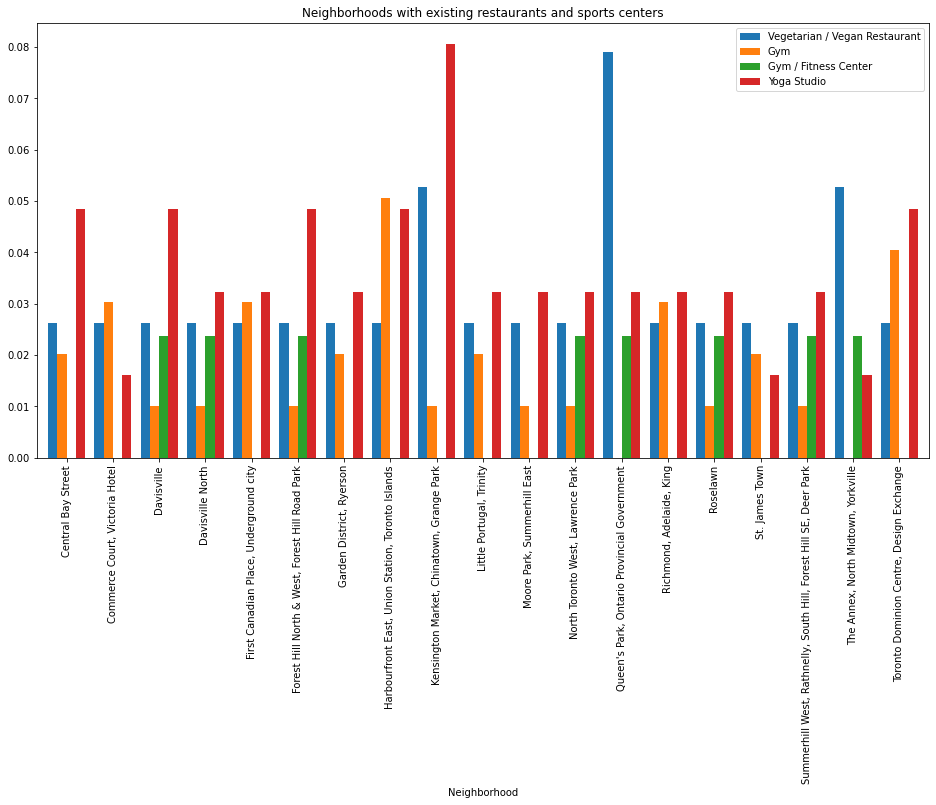

In [118]:
plot_data = toronto_grouped[(toronto_grouped['Vegetarian / Vegan Restaurant']!=0) & ((toronto_grouped['Gym']!=0) | (toronto_grouped['Gym / Fitness Center']!=0)) & (toronto_grouped['Yoga Studio']!=0)] # Neighborhoods with existing Vegetarian / Vegan Restaurant 
plot_data.plot(kind='bar', x='Neighborhood', width=0.8, figsize=(16,8))
plt.rc('xtick',labelsize=10)
plt.legend(loc='best', fontsize=10) 
plt.title('Neighborhoods with existing restaurants and sports centers')

#### then we plot neighborhoods with no Vegetarian restaurants and existing sports centers

Text(0.5, 1.0, 'Neighborhoods with no Vegetarian restaurants and existing sports centers')

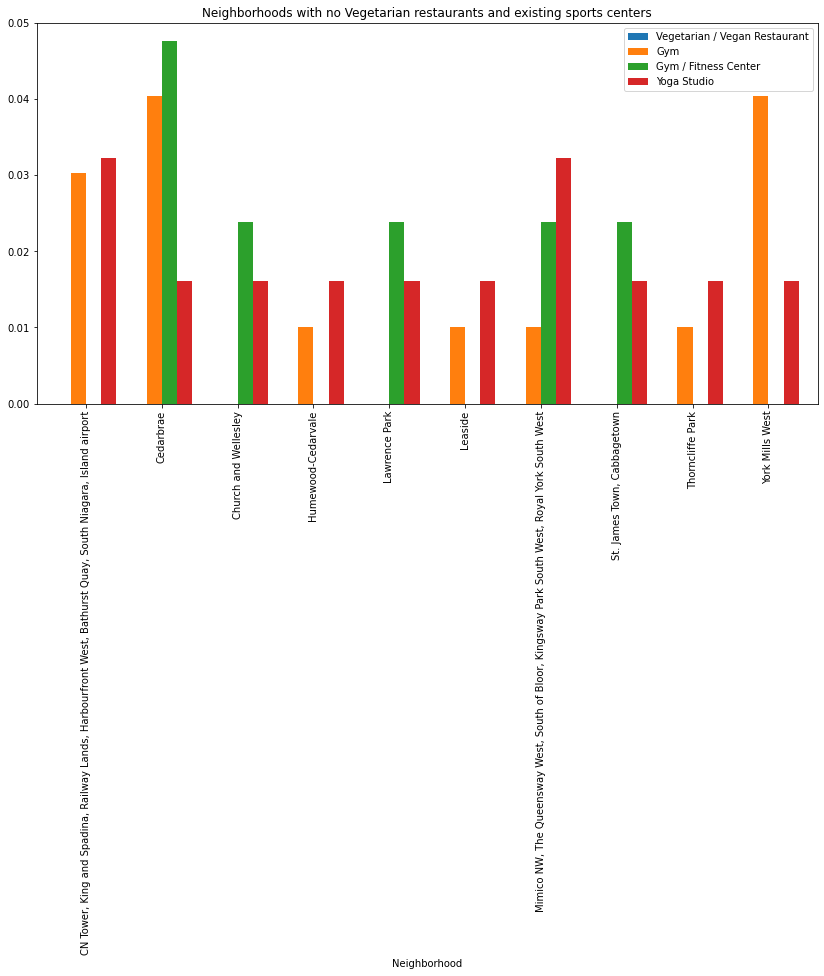

In [117]:
plot_data2 = toronto_grouped[(toronto_grouped['Vegetarian / Vegan Restaurant']==0) & ((toronto_grouped['Gym']!=0) | (toronto_grouped['Gym / Fitness Center']!=0)) & (toronto_grouped['Yoga Studio']!=0)] # Neighborhoods with no Vegetarian / Vegan Restaurant 
plot_data2.plot(kind='bar', x='Neighborhood', width=0.8, figsize=(14,7)) 
plt.rc('xtick',labelsize=10)
plt.legend(loc='best', fontsize=10)
plt.title('Neighborhoods with no Vegetarian restaurants and existing sports centers')

In [119]:

plot_data = toronto_grouped[['Neighborhood','Vegetarian / Vegan Restaurant']].set_index('Neighborhood',inplace = True)
plot_data

In [24]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                           venue  freq
0           Gym / Fitness Center  0.05
1                            Gym  0.01
2  Vegetarian / Vegan Restaurant  0.00
3                    Yoga Studio  0.00


----Alderwood, Long Branch----
                           venue  freq
0                            Gym  0.01
1  Vegetarian / Vegan Restaurant  0.00
2           Gym / Fitness Center  0.00
3                    Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                           venue  freq
0                            Gym  0.01
1  Vegetarian / Vegan Restaurant  0.00
2           Gym / Fitness Center  0.00
3                    Yoga Studio  0.00


----Berczy Park----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.03
1                            Gym  0.02
2           Gym / Fitness Center  0.00
3                    Yoga Studio  0.00


----Birch Cliff, Cliffside West----
                           venue  freq
0                         

## 4.clustering :

In [122]:
from sklearn.cluster import KMeans

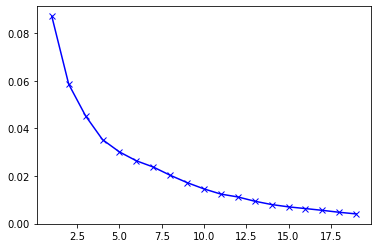

In [123]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
inertia = []
k_range = range(1,20)
for k in k_range:
    model = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia,'bx-')

we will take k = 4.

In [124]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40]

array([1, 3, 3, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 3, 1, 3, 1, 3,
       2, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 2], dtype=int32)

#### Let's add another column wich shows the cluster of each Neighborhood.

In [125]:
toronto_grouped.insert(1, 'Cluster', kmeans.labels_)

In [126]:
data_unique = data[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']].drop_duplicates(subset = 'Neighborhood')
toronto_grouped_ = toronto_grouped.merge(data_unique,on = 'Neighborhood' )
toronto_grouped_.head()

,Neighborhood,Cluster,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio,Neighborhood Latitude,Neighborhood Longitude
0,Agincourt,1,0.000000,0.010101,0.047619,0.0,43.794200,-79.262029
1,"Alderwood, Long Branch",3,0.000000,0.010101,0.000000,0.0,43.602414,-79.543484
2,"Bedford Park, Lawrence Manor East",3,0.000000,0.010101,0.000000,0.0,43.733283,-79.419750
3,Berczy Park,3,0.026316,0.020202,0.000000,0.0,43.644771,-79.373306
4,"Birch Cliff, Cliffside West",3,0.000000,0.010101,0.000000,0.0,43.692657,-79.264848


#### Finally, let's visualize the resulting clusters

In [127]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_grouped_['Neighborhood Latitude'], toronto_grouped_['Neighborhood Longitude'], toronto_grouped_['Neighborhood'], toronto_grouped_['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 0 :

In [31]:
toronto_grouped_.loc[toronto_grouped_['Cluster'] == 0, ['Neighborhood','Cluster','Vegetarian / Vegan Restaurant','Gym','Gym / Fitness Center','Yoga Studio']]

,Neighborhood,Cluster,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio
5,"Brockton, Parkdale Village, Exhibition Place",0,0.052632,0.010101,0.02381,0.000000
11,Christie,0,0.105263,0.000000,0.00000,0.000000
50,"Queen's Park, Ontario Provincial Government",0,0.078947,0.000000,0.02381,0.032258
64,"The Annex, North Midtown, Yorkville",0,0.052632,0.000000,0.02381,0.016129


### Cluster 1 :

In [39]:
toronto_grouped_.loc[toronto_grouped_['Cluster'] == 1, ['Neighborhood','Cluster','Vegetarian / Vegan Restaurant','Gym','Gym / Fitness Center','Yoga Studio']]

,Neighborhood,Cluster,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio
0,Agincourt,1,0.000000,0.010101,0.047619,0.000000
8,Canada Post Gateway Processing Centre,1,0.000000,0.000000,0.023810,0.000000
9,Cedarbrae,1,0.000000,0.040404,0.047619,0.016129
12,Church and Wellesley,1,0.000000,0.000000,0.023810,0.016129
16,Don Mills,1,0.000000,0.040404,0.023810,0.000000
18,Downsview,1,0.000000,0.000000,0.071429,0.000000
20,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",1,0.000000,0.010101,0.023810,0.000000
25,"Golden Mile, Clairlea, Oakridge",1,0.026316,0.010101,0.023810,0.000000
26,"Guildwood, Morningside, West Hill",1,0.000000,0.000000,0.023810,0.000000
36,"Lawrence Manor, Lawrence Heights",1,0.000000,0.000000,0.023810,0.000000


### Cluster 2 :

In [33]:
toronto_grouped_.loc[toronto_grouped_['Cluster'] == 2, ['Neighborhood','Cluster','Vegetarian / Vegan Restaurant','Gym','Gym / Fitness Center','Yoga Studio']]

,Neighborhood,Cluster,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio
7,"CN Tower, King and Spadina, Railway Lands, Har...",2,0.000000,0.030303,0.00000,0.032258
10,Central Bay Street,2,0.026316,0.020202,0.00000,0.048387
13,"Commerce Court, Victoria Hotel",2,0.026316,0.030303,0.00000,0.016129
14,Davisville,2,0.026316,0.010101,0.02381,0.048387
15,Davisville North,2,0.026316,0.010101,0.02381,0.032258
22,"First Canadian Place, Underground city",2,0.026316,0.030303,0.00000,0.032258
23,"Forest Hill North & West, Forest Hill Road Park",2,0.026316,0.010101,0.02381,0.048387
24,"Garden District, Ryerson",2,0.026316,0.020202,0.00000,0.032258
27,"Harbourfront East, Union Station, Toronto Islands",2,0.026316,0.050505,0.00000,0.048387
34,"Kensington Market, Chinatown, Grange Park",2,0.052632,0.010101,0.00000,0.080645


### Cluster 3 :

In [37]:
toronto_grouped_.loc[toronto_grouped_['Cluster'] == 3, ['Neighborhood','Cluster','Vegetarian / Vegan Restaurant','Gym','Gym / Fitness Center','Yoga Studio']]

,Neighborhood,Cluster,Vegetarian / Vegan Restaurant,Gym,Gym / Fitness Center,Yoga Studio
1,"Alderwood, Long Branch",3,0.000000,0.010101,0.0,0.000000
2,"Bedford Park, Lawrence Manor East",3,0.000000,0.010101,0.0,0.000000
3,Berczy Park,3,0.026316,0.020202,0.0,0.000000
4,"Birch Cliff, Cliffside West",3,0.000000,0.010101,0.0,0.000000
6,"Business reply mail Processing Centre, South C...",3,0.000000,0.020202,0.0,0.000000
17,"Dorset Park, Wexford Heights, Scarborough Town...",3,0.000000,0.010101,0.0,0.000000
19,"East Toronto, Broadview North (Old East York)",3,0.000000,0.000000,0.0,0.032258
21,"Fairview, Henry Farm, Oriole",3,0.000000,0.010101,0.0,0.000000
28,"High Park, The Junction South",3,0.000000,0.000000,0.0,0.016129
29,Hillcrest Village,3,0.000000,0.020202,0.0,0.000000


#### Let's see the percentage of each feature in each specific cluster.

In [35]:

for k in [0,1,2,3]:
    a =toronto_grouped_.loc[toronto_grouped_['Cluster'] == k, ['Neighborhood','Cluster','Vegetarian / Vegan Restaurant','Gym','Gym / Fitness Center','Yoga Studio']]

    print(k,"--------(Vegetarian)---------------",sum(a['Vegetarian / Vegan Restaurant']))
    print(k,"--------('Gym')--------------------",sum(a['Gym']))
    print(k,"--------('Gym / Fitness Center')---",sum(a['Gym / Fitness Center']))
    print(k,"--------('Yoga Studio')------------",sum(a['Yoga Studio']),"\n")

0 --------(Vegetarian)--------------- 0.2894736842105263
0 --------('Gym')-------------------- 0.010101010101010102
0 --------('Gym / Fitness Center')--- 0.07142857142857142
0 --------('Yoga Studio')------------ 0.04838709677419355 

1 --------(Vegetarian)--------------- 0.13157894736842105
1 --------('Gym')-------------------- 0.25252525252525254
1 --------('Gym / Fitness Center')--- 0.785714285714286
1 --------('Yoga Studio')------------ 0.0967741935483871 

2 --------(Vegetarian)--------------- 0.4736842105263156
2 --------('Gym')-------------------- 0.37373737373737376
2 --------('Gym / Fitness Center')--- 0.14285714285714285
2 --------('Yoga Studio')------------ 0.6774193548387094 

3 --------(Vegetarian)--------------- 0.10526315789473684
3 --------('Gym')-------------------- 0.3636363636363637
3 --------('Gym / Fitness Center')--- 0.0
3 --------('Yoga Studio')------------ 0.17741935483870963 

